In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sn
import ipywidgets as widgets
from IPython.display import display
          

In [2]:
df_energy = pd.read_csv('energy_dataset.csv')
df_energy.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04


In [3]:
# Drop unusable columns

df_energy = df_energy.drop(['generation fossil coal-derived gas','generation fossil oil shale', 
                            'generation fossil peat', 'generation geothermal', 
                            'generation hydro pumped storage aggregated', 'generation marine', 
                            'generation wind offshore', 'forecast wind offshore eday ahead'], 
                            axis=1)
#adding missing values
df_energy.fillna(df_energy.mean(), inplace=True)
df_energy.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,...,generation other renewable,generation solar,generation waste,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,...,73.0,49.0,196.0,6378.0,17.0,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,...,71.0,50.0,195.0,5890.0,16.0,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,...,73.0,50.0,196.0,5461.0,8.0,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,...,75.0,50.0,191.0,5238.0,2.0,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,...,74.0,42.0,189.0,4935.0,9.0,4861.0,21785.0,20264.0,38.41,56.04


In [4]:
df_energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 21 columns):
time                                           35064 non-null object
generation biomass                             35064 non-null float64
generation fossil brown coal/lignite           35064 non-null float64
generation fossil gas                          35064 non-null float64
generation fossil hard coal                    35064 non-null float64
generation fossil oil                          35064 non-null float64
generation hydro pumped storage consumption    35064 non-null float64
generation hydro run-of-river and poundage     35064 non-null float64
generation hydro water reservoir               35064 non-null float64
generation nuclear                             35064 non-null float64
generation other                               35064 non-null float64
generation other renewable                     35064 non-null float64
generation solar                               35064

In [5]:
from datetime import datetime
df_energy['time']=pd.to_datetime(df_energy['time'],utc=True,format='%Y-%m-%d %H:%M:%S')
#indexed_df=df_energy.set_index('time')
#indexed_df.head()

In [6]:
dateTime=df_energy['time']
dateTime.head()

0   2014-12-31 23:00:00+00:00
1   2015-01-01 00:00:00+00:00
2   2015-01-01 01:00:00+00:00
3   2015-01-01 02:00:00+00:00
4   2015-01-01 03:00:00+00:00
Name: time, dtype: datetime64[ns, UTC]

In [7]:
df_energy.head(51)

,time,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,...,generation other renewable,generation solar,generation waste,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2014-12-31 23:00:00+00:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,...,73.0,49.0,196.0,6378.0,17.0,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 00:00:00+00:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,...,71.0,50.0,195.0,5890.0,16.0,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 01:00:00+00:00,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,...,73.0,50.0,196.0,5461.0,8.0,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 02:00:00+00:00,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,...,75.0,50.0,191.0,5238.0,2.0,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 03:00:00+00:00,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,...,74.0,42.0,189.0,4935.0,9.0,4861.0,21785.0,20264.0,38.41,56.04
5,2015-01-01 04:00:00+00:00,410.0,178.0,4038.0,3590.0,156.0,2109.0,952.0,743.0,7098.0,...,74.0,34.0,188.0,4618.0,4.0,4617.0,21441.0,19905.0,35.72,53.63
6,2015-01-01 05:00:00+00:00,401.0,172.0,4040.0,3368.0,158.0,2108.0,961.0,848.0,7098.0,...,74.0,34.0,186.0,4397.0,3.0,4276.0,21285.0,20010.0,35.13,51.73
7,2015-01-01 06:00:00+00:00,408.0,172.0,4030.0,3208.0,160.0,2031.0,983.0,1012.0,7099.0,...,72.0,35.0,189.0,3992.0,12.0,3994.0,21545.0,20377.0,36.22,51.43
8,2015-01-01 07:00:00+00:00,413.0,177.0,4052.0,3335.0,161.0,2119.0,1001.0,1015.0,7098.0,...,73.0,54.0,198.0,3629.0,39.0,3602.0,21443.0,20094.0,32.40,48.98
9,2015-01-01 08:00:00+00:00,419.0,177.0,4137.0,3437.0,163.0,2170.0,1041.0,1357.0,7097.0,...,74.0,743.0,198.0,3073.0,784.0,3212.0,21560.0,20637.0,36.60,54.20


In [8]:
dateTime[50].day

3

In [9]:
df_energy['price actual'][50]

58.79

In [10]:
df_energy['generation biomass'][50]

452.0

In [11]:
range (0,len(df_energy)+1)

range(0, 35065)

In [12]:
dateTime[50]

Timestamp('2015-01-03 01:00:00+0000', tz='UTC')

C:\Users\pc\Anaconda3\Lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


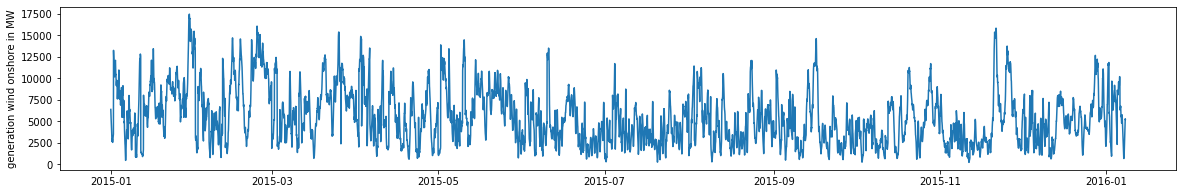

In [13]:
def OneColumnHourly(name):
    x=[]
    y=[]
    for i in range(0,8928):#len(df_energy)):
        x.append(dateTime[i])
        y.append(df_energy[name][i])
    plt.rcParams["figure.figsize"] = (20,3)
    plt.xlabel('')
    plt.ylabel(f'{name} in MW')
    plt.plot(x,y)
OneColumnHourly('generation wind onshore')    

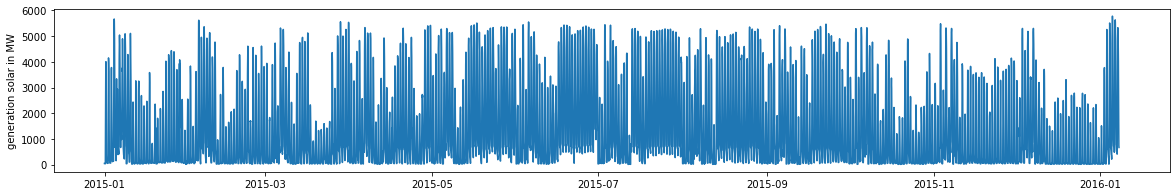

In [14]:
def OneColumnHourly(name):
    x=[]
    y=[]
    for i in range(0,8928):#len(df_energy)):
        x.append(dateTime[i])
        y.append(df_energy[name][i])
    plt.rcParams["figure.figsize"] = (20,3)
    plt.xlabel('')
    plt.ylabel(f'{name} in MW')
    plt.plot(x,y)
OneColumnHourly('generation solar')    

In [15]:
df_energy.shape

(35064, 21)

In [16]:
df_energy['generation wind onshore'].sum()

191606518.63585

In [17]:
df_energy.columns

Index(['time', 'generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil gas', 'generation fossil hard coal',
       'generation fossil oil', 'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation nuclear',
       'generation other', 'generation other renewable', 'generation solar',
       'generation waste', 'generation wind onshore',
       'forecast solar day ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead',
       'price actual'],
      dtype='object')

In [18]:
total_production = df_energy['generation biomass'] + df_energy['generation fossil brown coal/lignite'] + \
              df_energy['generation fossil gas'] + df_energy['generation fossil hard coal']+ \
            df_energy['generation fossil oil'] + df_energy['generation hydro pumped storage consumption']+ \
            df_energy['generation hydro run-of-river and poundage'] + df_energy['generation hydro water reservoir']+ \
            df_energy['generation nuclear'] + df_energy['generation other']+ \
            df_energy['generation other renewable'] + df_energy['generation solar']-df_energy['generation waste']+ \
            df_energy['generation wind onshore'] 



df_energy.insert(loc=len(df_energy.columns)-2, column='Total production', value=total_production) 

df_energy.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,...,generation solar,generation waste,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,Total production,price day ahead,price actual
0,2014-12-31 23:00:00+00:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,...,49.0,196.0,6378.0,17.0,6436.0,26118.0,25385.0,27859.0,50.10,65.41
1,2015-01-01 00:00:00+00:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,...,50.0,195.0,5890.0,16.0,5856.0,24934.0,24382.0,27428.0,48.10,64.92
2,2015-01-01 01:00:00+00:00,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,...,50.0,196.0,5461.0,8.0,5454.0,23515.0,22734.0,26404.0,47.33,64.48
3,2015-01-01 02:00:00+00:00,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,...,50.0,191.0,5238.0,2.0,5151.0,22642.0,21286.0,24841.0,42.27,59.32
4,2015-01-01 03:00:00+00:00,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,...,42.0,189.0,4935.0,9.0,4861.0,21785.0,20264.0,24242.0,38.41,56.04


In [19]:
from ipywidgets import Button,Layout,HBox,VBox
l=Layout(width='150%',height='200px')
btn1 = widgets.Button(description='generation biomass')
btn2 = widgets.Button(description='generation fossil brown coal/lignite')
btn3 = widgets.Button(description='generation fossil gas')
btn4 = widgets.Button(description='generation fossil hard coal')
btn5 = widgets.Button(description='generation fossil oil')
btn6 = widgets.Button(description='generation hydro pumped storage consumption')
btn7 = widgets.Button(description='generation hydro run-of-river and poundage')
btn8 = widgets.Button(description='generation hydro water reservoir')
btn9 = widgets.Button(description='generation nuclear')
btn10 = widgets.Button(description='generation other')
btn11 = widgets.Button(description='generation other renewable')
btn12 = widgets.Button(description='generation solar')
btn13 = widgets.Button(description='generation wind onshore')

def percentage(btn_object):
    if btn_object==btn1:
        print(f"{btn1.description.upper()} takes {(df_energy[btn1.description].sum()*100/df_energy['Total production'].sum()):.2f}% of total production.")
    if btn_object==btn2:
        print(f"{btn2.description.upper()} takes {(df_energy[btn2.description].sum()*100/df_energy['Total production'].sum()):.2f}% of total production.")
    if btn_object==btn3:
        print(f"{btn3.description.upper()} takes {(df_energy[btn3.description].sum()*100/df_energy['Total production'].sum()):.2f}% of total production.")
    if btn_object==btn4:
        print(f"{btn4.description.upper()} takes {(df_energy[btn4.description].sum()*100/df_energy['Total production'].sum()):.2f}% of total production.")
    if btn_object==btn5:
        print(f"{btn5.description.upper()} takes {(df_energy[btn5.description].sum()*100/df_energy['Total production'].sum()):.2f}% of total production.")
    if btn_object==btn6:
        print(f"{btn6.description.upper()} takes {(df_energy[btn6.description].sum()*100/df_energy['Total production'].sum()):.2f}% of total production.")
    if btn_object==btn7:
        print(f"{btn7.description.upper()} takes {(df_energy[btn7.description].sum()*100/df_energy['Total production'].sum()):.2f}% of total production.")
    if btn_object==btn8:
        print(f"{btn8.description.upper()} takes {(df_energy[btn8.description].sum()*100/df_energy['Total production'].sum()):.2f}% of total production.")
    if btn_object==btn9:
        print(f"{btn9.description.upper()} takes {(df_energy[btn9.description].sum()*100/df_energy['Total production'].sum()):.2f}% of total production.")
    if btn_object==btn10:
        print(f"{btn10.description.upper()} takes {(df_energy[btn10.description].sum()*100/df_energy['Total production'].sum()):.2f}% of total production.")
    if btn_object==btn11:
        print(f"{btn11.description.upper()} takes {(df_energy[btn11.description].sum()*100/df_energy['Total production'].sum()):.2f}% of total production.")
    if btn_object==btn12:
        print(f"{btn12.description.upper()} takes {(df_energy[btn12.description].sum()*100/df_energy['Total production'].sum()):.2f}% of total production.")
    if btn_object==btn13:
        print(f"{btn13.description.upper()} takes {(df_energy[btn13.description].sum()*100/df_energy['Total production'].sum()):.2f}% of total production.")
                        
        
   
btn1.on_click(percentage)
btn2.on_click(percentage)                 
btn3.on_click(percentage)
btn4.on_click(percentage)
btn5.on_click(percentage)
btn6.on_click(percentage)                 
btn7.on_click(percentage)
btn8.on_click(percentage)
btn9.on_click(percentage)
btn10.on_click(percentage)                 
btn11.on_click(percentage)
btn12.on_click(percentage)   
btn13.on_click(percentage)
print(f'Percentage of total generation in period {dateTime[0]} till {dateTime[len(df_energy)-1]} :')
#display(btn1,btn2,btn3,btn4,btn5,btn6,btn7,btn8,btn9,btn10,btn11,btn12,btn13)

left_box=VBox([btn1,btn2,btn3,btn4,btn5])
center_box=VBox([btn6,btn7,btn8,btn9,btn10])
right_box=VBox([btn11,btn12,btn13]) 


HBox([left_box,center_box,right_box])      


Percentage of total generation in period 2014-12-31 23:00:00+00:00 till 2018-12-31 22:00:00+00:00 :


Text(0, 0.5, 'total load actual in MWh')

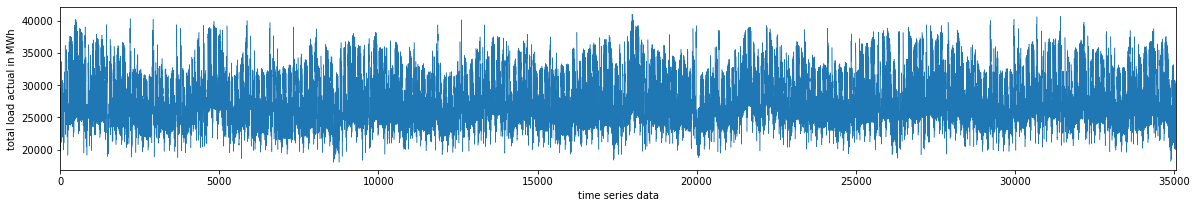

In [20]:
df_energy['total load actual'].plot(linewidth=0.5)
plt.xlabel('time series data')
plt.ylabel(f'total load actual in MWh')

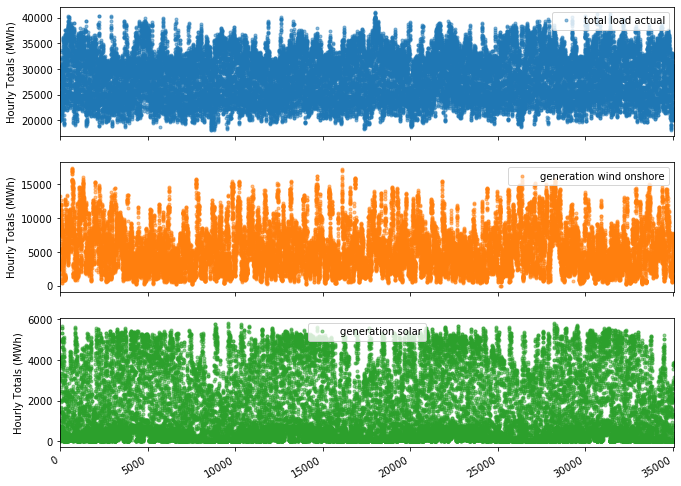

In [21]:
columns_plot=['total load actual','generation wind onshore','generation solar']
axes = df_energy[columns_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Hourly Totals (MWh)')